In [1]:
!pip install tensorflow-gpu==2.0.0-alpha0
!pip install tfp-nightly==0.7.0.dev20190519


     |████████████████████████████████| 332.1MB 66kB/s 
     |████████████████████████████████| 3.0MB 29.7MB/s 
     |████████████████████████████████| 419kB 44.4MB/s 
     |████████████████████████████████| 972kB 1.9MB/s 


In [0]:
import matplotlib.pyplot as plt
import numpy as np

import tensorflow as tf

import tensorflow_probability as tfp
tfd = tfp.distributions

%matplotlib inline



In [0]:
############################
############################
############################
# turn the fish around 
# have more data points on one side 
# use random uniform for the x data (not linespace)

In [4]:
print(tf.__version__)
print(tfp.__version__)

2.0.0-alpha0
0.7.0-dev20190519


In [0]:
from google.colab import files


In [0]:
x1=np.arange(0,1,0.01)


In [7]:
x1=np.arange(1,12,0.15)
x1=x1[::-1]
print(len(x1))
x2=np.repeat(1,20)
print(len(x2))
x3=np.arange(1,15,0.1)
x4=np.repeat(15,30)
print(len(x3))
x5=x3[::-1]
print(len(x4))
x6=np.repeat(1,20)
#x5=np.arange(0,20,0.02)
#print(len(x5))
#x6=x5[::-1]
#x7=np.repeat(0,20)

#x=np.concatenate([x1,x2,x3,x4,x5,x6,x7])

x=np.concatenate([x1,x2,x3,x4,x5,x6])


74
20
140
30


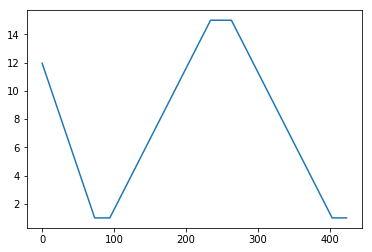

In [8]:
plt.plot(x)

In [9]:
print(len(x))

424


In [0]:
np.random.seed(77)
noise=np.random.normal(0,x,len(x))

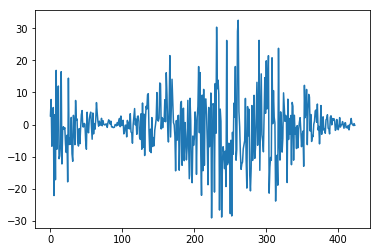

In [11]:
plt.plot(noise)

In [12]:
print(len(x))#anz punkte

424


In [0]:
np.random.seed(99)
first_part=len(x1)
x11=np.random.uniform(-1,1,first_part)
np.random.seed(97)
x12=np.random.uniform(1,6,len(noise)-first_part)
x=np.concatenate([x11,x12])

In [0]:
x=np.sort(x)

In [0]:
y=2.7*x+noise

In [0]:
y=y.reshape((len(y),1))
x=x.reshape((len(x),1))

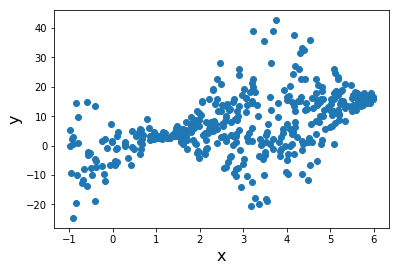

In [17]:
plt.scatter(x,y)
plt.xlabel("x",size=16)
plt.ylabel("y",size=16)#pred
plt.show()

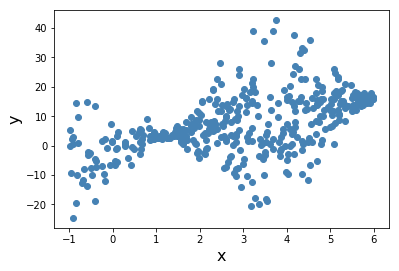

In [18]:
#plt.figure(figsize=(10,10))
plt.scatter(x,y,color="steelblue")
plt.xlabel("x",size=16)
plt.ylabel("y",size=16)#pred
plt.savefig("fish_1.pdf")
files.download("fish_1.pdf")

In [19]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1,input_shape=(1,)))
model.compile(loss='mse',                    #A
         optimizer="adam", metrics=['accuracy'])
model.fit(x,y,batch_size=16,epochs=2000,verbose=0)
#A call the standard Keras loss MSE 


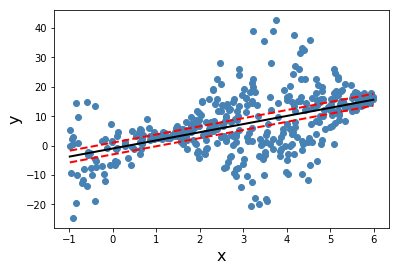

In [20]:
plt.scatter(x,y,color="steelblue") #observerd 
plt.plot(x,model.predict(x),color="black",linewidth=2)
plt.plot(x,model.predict(x)+2,color="red",linestyle="--",linewidth=2)
plt.plot(x,model.predict(x)-2,color="red",linestyle="--",linewidth=2)
plt.xlabel("x",size=16)
plt.ylabel("y",size=16)
plt.savefig("fish_2.pdf")
files.download("fish_2.pdf")

In [21]:
def NLL(y, rv_y):
  return -rv_y.log_prob(y) #A
model = tf.keras.Sequential() 
model.add(tf.keras.layers.Dense(1,input_shape=(1,))) #B
model.add(tfp.layers.DistributionLambda(lambda t: tfd.Normal(loc=t, scale=1))) #C
model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.01), loss=NLL) #D
model.fit(x, y, epochs=1000, verbose=0)


In [22]:
def NLL(y, rv_y):
  return -rv_y.log_prob(y) #A
model = tf.keras.Sequential() 
model.add(tf.keras.layers.Dense(2,input_shape=(1,))) #B
model.add(tfp.layers.DistributionLambda(  
        lambda t: tfd.Normal(loc=t[:,0:1], #C
        scale=1e-3 + tf.math.softplus(0.05 * t[:,1:2])))) #D
model.compile(optimizer=tf.optimizers.Adam(), loss=NLL) 
model.fit(x, y, epochs=1000, verbose=0)


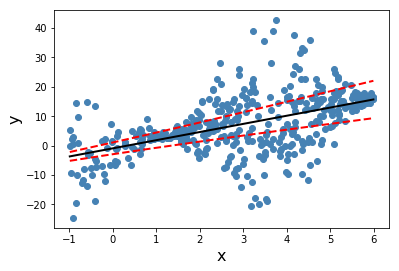

In [23]:
plt.scatter(x,y,color="steelblue") #observerd 
plt.plot(x,model(x).mean(),color="black",linewidth=2)
plt.plot(x,model(x).mean()+2*model(x).stddev(),color="red",linestyle="--",linewidth=2)
plt.plot(x,model(x).mean()-2*model(x).stddev(),color="red",linestyle="--",linewidth=2)
plt.xlabel("x",size=16)
plt.ylabel("y",size=16)
plt.savefig("fish_3.pdf")
files.download("fish_3.pdf")

In [0]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

In [0]:
def NLL(y, rv_y):
  return -rv_y.log_prob(y) #A
inputs = Input(shape=(1,))
out1 = tf.keras.layers.Dense(1)(inputs)
hidden = tf.keras.layers.Dense(20,activation="relu")(inputs)
out2 = tf.keras.layers.Dense(1)(hidden)
out = tf.keras.layers.Concatenate()([out1,out2])
predictions = tfp.layers.DistributionLambda(lambda t: 
     tfd.Normal(loc=t[:, 0:1],
     scale=1e-3 + tf.math.softplus(0.05 * t[:,1:2])))(out)
model = Model(inputs=inputs, outputs=predictions)
model.compile(optimizer=tf.optimizers.Adam(), loss=NLL)


In [33]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
dense_7 (Dense)                 (None, 20)           40          input_2[0][0]                    
__________________________________________________________________________________________________
dense_6 (Dense)                 (None, 1)            2           input_2[0][0]                    
__________________________________________________________________________________________________
dense_8 (Dense)                 (None, 1)            21          dense_7[0][0]                    
____________________________________________________________________________________________

In [51]:
model.fit(x,y,epochs=8000,verbose=0)



In [53]:
model.evaluate(x,y)#should be around 3.1
#if not train longer

424/424 [==============================] - 0s 59us/sample - loss: 3.1516


3.1515773084928407

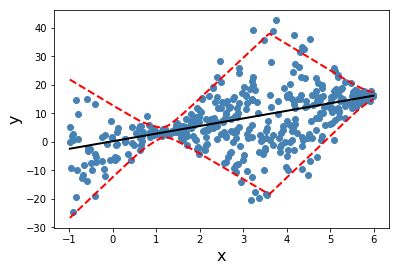

In [54]:
plt.scatter(x,y,color="steelblue") #observerd 
plt.plot(x,model(x).mean(),color="black",linewidth=2)
plt.plot(x,model(x).mean()+2*model(x).stddev(),color="red",linestyle="--",linewidth=2)
plt.plot(x,model(x).mean()-2*model(x).stddev(),color="red",linestyle="--",linewidth=2)
plt.xlabel("x",size=16)
plt.ylabel("y",size=16)
plt.savefig("fish_4.pdf")
files.download("fish_4.pdf")

In [55]:
x_tst=np.arange(-3,8,0.1)
x_tst=x_tst.reshape((len(x_tst),1))
x_tst.shape

(110, 1)

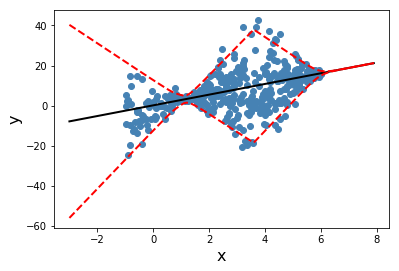

In [56]:
plt.scatter(x,y,color="steelblue") #observerd 
plt.plot(x_tst,model(x_tst).mean(),color="black",linewidth=2)
plt.plot(x_tst,model(x_tst).mean()+2*model(x_tst).stddev(),color="red",linestyle="--",linewidth=2)
plt.plot(x_tst,model(x_tst).mean()-2*model(x_tst).stddev(),color="red",linestyle="--",linewidth=2)
plt.xlabel("x",size=16)
plt.ylabel("y",size=16)
plt.savefig("fish_5.pdf")
files.download("fish_5.pdf")